In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
#                                                                 TASK - 1

In [3]:
# loading the dataset
df = pd.read_csv('imdb.csv')

# checking for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [53]:
# Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [55]:
# Top 5 rows of the dataset
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [5]:
# length of the reviews
print('length of reviews is :', len(df['review']))


length of reviews is : 50000


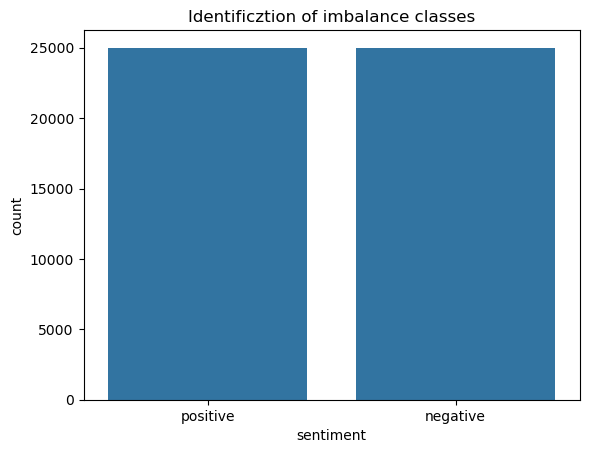

In [7]:
# identifying imbalance

sns.countplot(x='sentiment',data=df)
plt.title('Identificztion of imbalance classes')
plt.show()

# There is no imbalance both are in same count

In [57]:
# Preprocessing
# removing stopwords and non-alphbetic chars and white spaces 
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text =re.sub(r'[^a-z\s]', '', text)
    return text

df['review'] = df['review'].apply(clean_text)

df['review'] = df['review'].apply(lambda x:[word for word in word_tokenize(x) if word not in stop_words])
df

,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",positive
1,"[wonderful, little, production, br, br, filmin...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, think, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


In [12]:
# applying lemmatization

from nltk.stem import WordNetLemmatizer

lemmatization = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x:' '.join([lemmatization.lemmatize(word) for word in x]))
df

,review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,im going disagree previous comment side maltin...,negative


In [13]:
# Converting categorical into numerical through the TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# initializing x and y values
x = df['review']
y = df['sentiment']

# splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

# Transforming categorical into numerical values
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)



In [19]:
# Building logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

linear_model = LogisticRegression()
linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

# Evaluation metrics
print('accuracy is :', accuracy_score(y_test, y_predict)*100)
print('classification_report : \n',classification_report(y_test, y_predict))



accuracy is : 89.48
classification_report : 
               precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [21]:
# Building decision tree model
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
tree_model.fit(x_train, y_train)

y_predict = tree_model.predict(x_test)

# Evaluation metrics
print('accuracy is :', accuracy_score(y_test, y_predict)*100)
print('classification_report : \n',classification_report(y_test, y_predict))


accuracy is : 73.08
classification_report : 
               precision    recall  f1-score   support

    negative       0.80      0.61      0.69      4961
    positive       0.69      0.85      0.76      5039

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [27]:
# Building Random Forest model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 120)
rf_model.fit(x_train, y_train)

r_predict = rf_model.predict(x_test)

print('accuracy is :', accuracy_score(y_test, r_predict)*100)
print('classification_report : \n',classification_report(y_test, r_predict))



accuracy is : 85.7
classification_report : 
               precision    recall  f1-score   support

    negative       0.85      0.86      0.86      4961
    positive       0.86      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [23]:
# Building SVM model

from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(x_train, y_train)

s_predict = svm.predict(x_test)

print('accuracy is :', accuracy_score(y_test, s_predict)*100)
print('classification_report : \n',classification_report(y_test, s_predict))




accuracy is : 89.52
classification_report : 
               precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Video Presentation drive link

https://drive.google.com/file/d/11i0COCAlA_qvBmEPJwlOzMnzSQWFX0nR/view?usp=sharing

In [ ]:
#                                                                 TASK - 2

In [25]:
# Loading the dataset

data = pd.read_csv('data_news.csv')
data.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [27]:
# checking for null values
data.isnull().sum()

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

In [29]:
# basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [31]:
# Dropping the rows of missing data
r_data = data.dropna().reset_index()
r_data.head()

,index,category,headline,links,short_description,keywords
0,0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


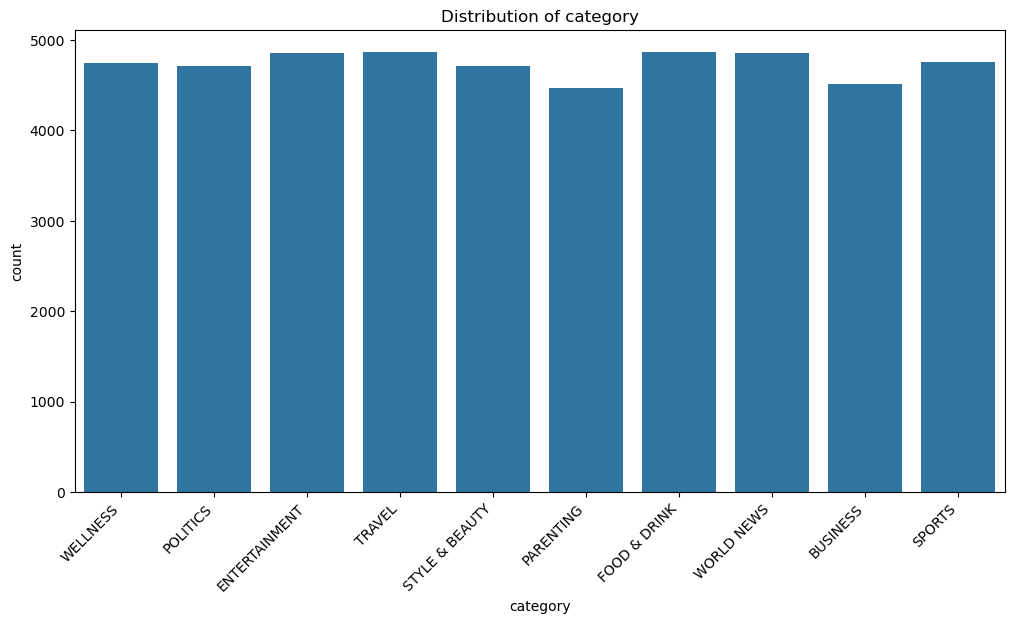

In [33]:
# counting the distribution of categori column
plt.figure(figsize=(12,6))
sns.countplot(x='category', data=r_data)
plt.xticks(rotation=45, ha = 'right')
plt.title('Distribution of category')
plt.show()

In [41]:
# preprocessing the data

# combining the headline and short description columns due to can't able to provide multiple inputs to Tf-IDF
r_data.loc[:,'combine'] = r_data['headline'] + ' ' +['short_description']

# removing punctuations and non-alphabetics and whitespaces and applying wordtokenizing and removing stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '',text) #removing punctuation and whitespaces and non-alphabetic chars
    tokens = ' '.join([word for word in word_tokenize(text) if word not in stop_words]) #applying wordtokenize and taking except stopwords
    return tokens
   
r_data.loc[:,'combine'] = r_data['combine'].apply(clean_text) #Applying the preprocessing/cleaning function
r_data


,index,category,headline,links,short_description,keywords,combine
0,0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons,miles days lessons learned shortdescription
1,1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,talking crazy crazy helpful shortdescription
2,2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,crenezumab trial gauge whether alzheimers drug...
3,3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life,oh difference made shortdescription
4,4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods,green superfoods shortdescription
...,...,...,...,...,...,...,...
47327,49993,SPORTS,Norovirus Outbreak At Winter Olympics Prompts ...,https://www.huffingtonpost.com/entry/norovirus...,Troops will replace hundreds of civilian secur...,norovirus-outbreak-at-winter-olympics-prompts-...,norovirus outbreak winter olympics prompts mil...
47328,49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night,baseball team learned theres wrong way celebra...
47329,49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs,young spurs fan dabbed times single playoff ga...
47330,49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie,rasheed wallace ejected knickssuns game yellin...


In [43]:
# Building a LogisticRegression model

x = r_data['combine']
y = r_data['category']

# splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Converting categorical values into numerical through the TF-IDF vectorization
vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

# Initializing the model
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

y1_predict = model.predict(x_test)
print(f'accuracy_score is : {accuracy_score(y_test, y1_predict)*100:.2f}')
print(f'classification_report is : \n{classification_report(y_test, y1_predict)}')

accuracy_score is : 76.57
classification_report is : 
                precision    recall  f1-score   support

      BUSINESS       0.71      0.73      0.72       908
 ENTERTAINMENT       0.71      0.77      0.74       923
  FOOD & DRINK       0.83      0.79      0.81       987
     PARENTING       0.76      0.70      0.73       900
      POLITICS       0.77      0.70      0.73       955
        SPORTS       0.86      0.89      0.88       968
STYLE & BEAUTY       0.85      0.81      0.83       903
        TRAVEL       0.78      0.74      0.76       958
      WELLNESS       0.62      0.73      0.67       969
    WORLD NEWS       0.80      0.79      0.79       996

      accuracy                           0.77      9467
     macro avg       0.77      0.77      0.77      9467
  weighted avg       0.77      0.77      0.77      9467



In [45]:
# Building Random Forest model
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=120, n_jobs=-1)
RF_model.fit(x_train, y_train)

y1_predict = RF_model.predict(x_test)
print(f'accuracy_score is : {accuracy_score(y_test, y1_predict)*100:.2f}')
print(f'classification_report is : \n{classification_report(y_test, y1_predict)}')


accuracy_score is : 69.48
classification_report is : 
                precision    recall  f1-score   support

      BUSINESS       0.81      0.74      0.77       908
 ENTERTAINMENT       0.58      0.66      0.62       923
  FOOD & DRINK       0.76      0.69      0.72       987
     PARENTING       0.72      0.66      0.69       900
      POLITICS       0.76      0.58      0.66       955
        SPORTS       0.90      0.89      0.90       968
STYLE & BEAUTY       0.78      0.74      0.76       903
        TRAVEL       0.65      0.63      0.64       958
      WELLNESS       0.44      0.69      0.54       969
    WORLD NEWS       0.76      0.67      0.71       996

      accuracy                           0.69      9467
     macro avg       0.72      0.69      0.70      9467
  weighted avg       0.72      0.69      0.70      9467



In [221]:
# Building svm model

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y1_predict = svc.predict(x_test)
print(f'accuracy_score is : {accuracy_score(y_test, y1_predict)*100:.2f}')
print(f'classification_report is : \n{classification_report(y_test, y1_predict)}')


accuracy_score is : 78.49
classification_report is : 
                precision    recall  f1-score   support

      BUSINESS       0.82      0.77      0.80       908
 ENTERTAINMENT       0.70      0.80      0.75       923
  FOOD & DRINK       0.85      0.80      0.82       987
     PARENTING       0.77      0.70      0.73       900
      POLITICS       0.76      0.71      0.74       955
        SPORTS       0.93      0.92      0.93       968
STYLE & BEAUTY       0.89      0.81      0.85       903
        TRAVEL       0.79      0.76      0.77       958
      WELLNESS       0.61      0.78      0.68       969
    WORLD NEWS       0.81      0.80      0.80       996

      accuracy                           0.78      9467
     macro avg       0.79      0.78      0.79      9467
  weighted avg       0.79      0.78      0.79      9467



In [ ]:
# Video Presentation drive link

https://drive.google.com/file/d/1QAJB4uRJZ4HHqCOldySMx2aPyGy15BlL/view?usp=sharing